<a href="https://colab.research.google.com/github/BHUMIKA-2110/Data-Analysis/blob/main/TASK3_advancedTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries & Load Dataset**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**2. Data Cleaning**       
a. Fill missing Age values with mean

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


b. Drop irrelevant column (Cabin)

In [10]:
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

In [9]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


c. Feature Engineering (Age Groups)

In [11]:
bins=[0,12,18,35,60,100]
labels=['Child','Teenager','Young Adult','Adult','Senior']

df["AgeGroup"]= pd.cut(df["Age"],bins=bins,labels=labels)

**4. Analysis Questions**    
a. Survival rate by Age Group

In [12]:
df.groupby('AgeGroup')['Survived'].mean()

/tmp/ipython-input-2140893742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].mean()


,Survived
AgeGroup,
Child,0.480000
Teenager,0.413793
Young Adult,0.335907
Adult,0.393617
Senior,0.363636


b. Survival rate by Embarkation Port

In [14]:
df.groupby("Embarked")["Survived"].mean()

,Survived
Embarked,
C,0.392157
Q,0.521739
S,0.325926


c. Survival rate by Family Size

In [15]:
df["FamilySize"]=df["SibSp"]+df["Parch"]
df.groupby("FamilySize")["Survived"].mean()

,Survived
FamilySize,
0,0.268775
1,0.486486
2,0.526316
3,0.714286
4,0.285714
5,0.666667
6,0.250000
7,0.500000
10,0.500000


**5. Visualizations**  
a. Age Distribution (Histogram)

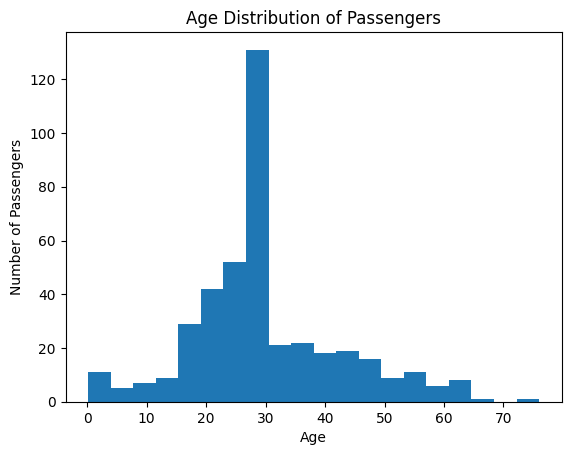

In [16]:
plt.hist(df['Age'],bins=20)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

b. Correlation Heatmap

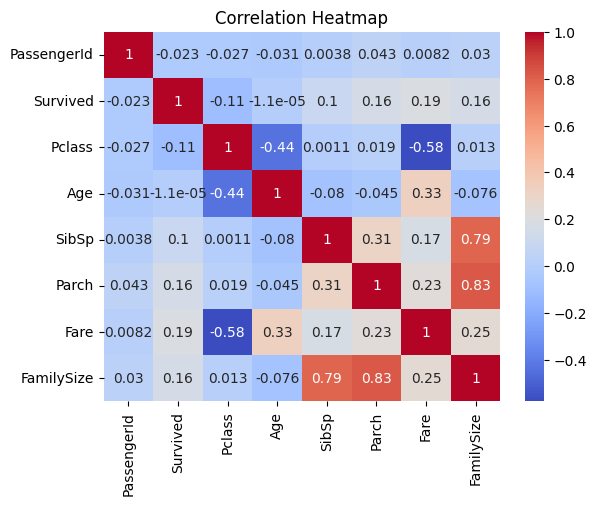

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

c. Survival by Family Size (Bar Plot)

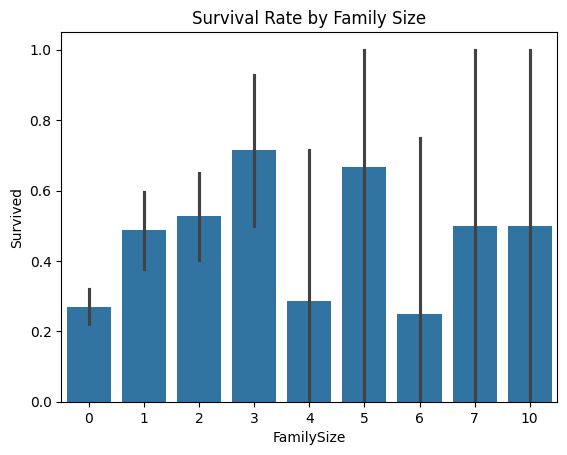

In [18]:
sns.barplot(x="FamilySize",y="Survived",data=df)
plt.title("Survival Rate by Family Size")
plt.show()

**Conclusion**  
The Titanic dataset was analyzed using Exploratory Data Analysis techniques. Missing age values were handled using mean imputation, and irrelevant columns were removed to improve data quality. Age-group analysis showed variations in survival chances across different age categories. Survival rates also differed based on embarkation ports, indicating possible socio-economic or boarding-location influences. Family size played an important role, where passengers traveling in small families had better survival chances than those alone or in very large groups. Correlation analysis helped understand relationships among numerical features. This task strengthened practical EDA skills, data cleaning techniques, and storytelling through visualizations.